In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
from sklearn.model_selection import train_test_split
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from lightgbm import LGBMClassifier
import seaborn as sns

In [16]:
train_x = pd.read_csv("train.csv")
test_x = pd.read_csv("test.csv")

In [4]:
train_x.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


Most of the Features are categorical. So they need to be label encoded or One hot encoded to convert them to numerical features.The categorical values are like labels. The machine learning algorithms require the inputs to be numbers and so we need to encode categorical variables values to numbers.

### Null Values present in test and train data

In [17]:
train_x.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [18]:
test_x.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                              35
patientid                               0
City_Code_Patient                    2157
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
dtype: int64

## Visualizing the distribution of output classes

Before that let us see the distribution of our data classes. There are seven classes in the Stay column.
Since they are given in ranges, let us first convert them into numrical values and then visualise there distribution.
The graph below shows the classes are imbalanced.

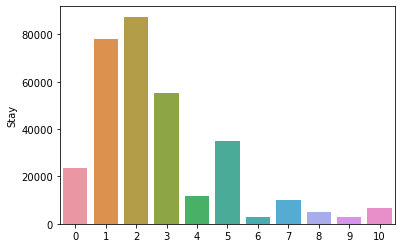

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_x['Stay'] =  le.fit_transform(train_x['Stay'])
x=train_x['Stay'].value_counts()
sns.barplot(x.index,x)

In [8]:
cols = ['Hospital_type_code','City_Code_Hospital',
       'Hospital_region_code'
       ,'Department'
       ,'Ward_Type',
       'Ward_Facility_Code',
       'Bed Grade','Type of Admission','Severity of Illness','Age']
from sklearn.preprocessing import LabelEncoder
for i in cols:
    le = LabelEncoder()
    train_x[i] = le.fit_transform(train_x[i].astype('str'))
    le = LabelEncoder()
    test_x[i] = le.fit_transform(test_x[i].astype('str'))

The boxplot was plotted to facilitates comparisons between variables. Determined lot of variations in all features.

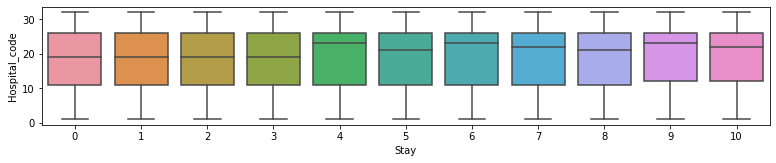

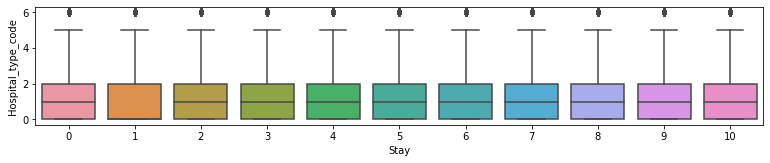

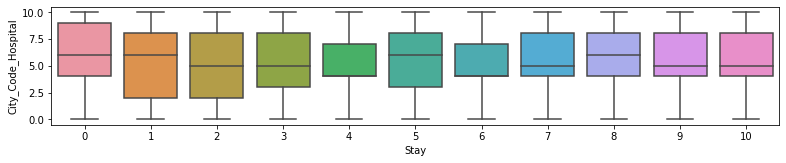

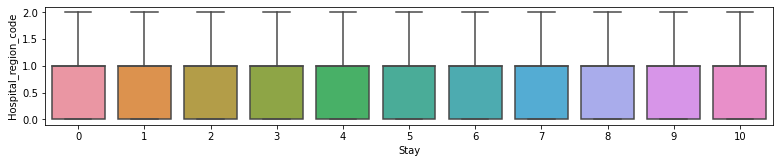

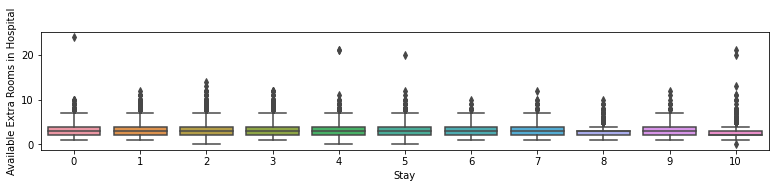

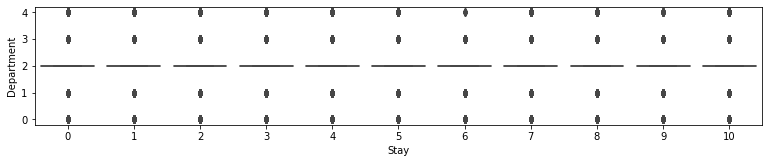

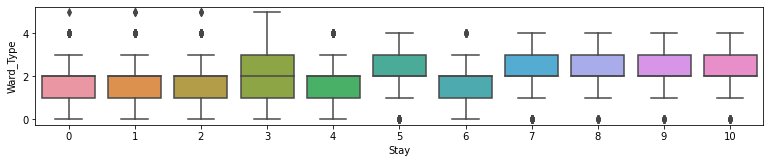

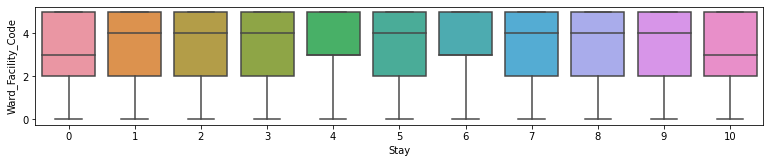

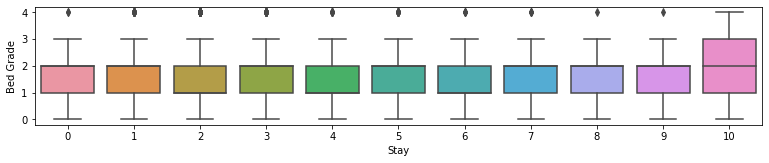

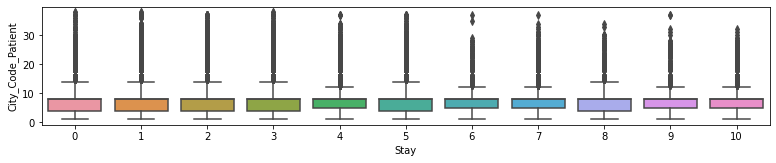

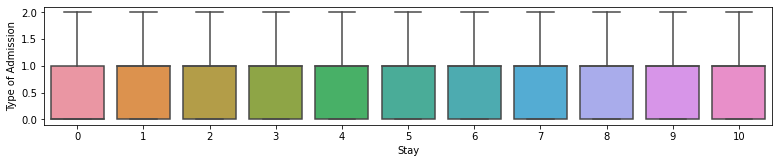

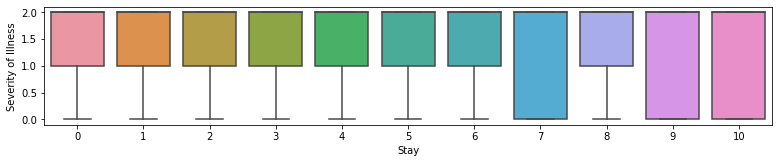

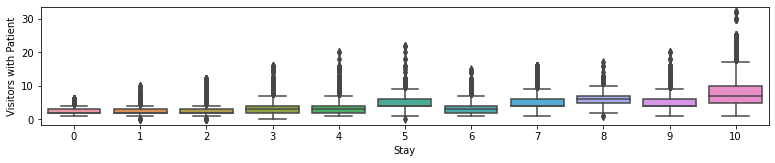

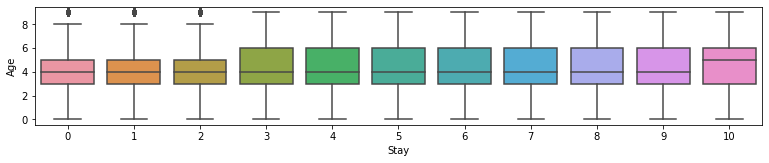

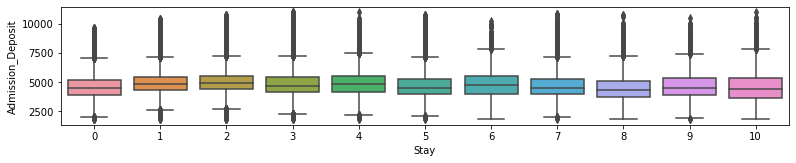

In [14]:
i = 1
for column in train_x.columns[~(train_x.columns.isin(['Stay', 'case_id', 'patientid']))].tolist():
    plt.figure(figsize = (60, 10))
    plt.subplot(4, 4, i)
    sns.boxplot(x = train_x['Stay'], y =train_x[column] )
    i += 1
    plt.show()